In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [178]:
s0, s, t0, ts = 1.1, 1.75, 0.15, 0.7
t1 = 0.4469
names = ["RSN6_IMPVALL.I_I-ELC180.csv", "RSN6_IMPVALL.I_I-ELC270.csv", 
         "RSN8_NCALIF.FH_F-FRN225.csv", "RSN8_NCALIF.FH_F-FRN315.csv", 
         "RSN15_KERN_TAF021.csv", "RSN15_KERN_TAF111.csv"]
names2 = ["RSN6x(180)", "RSN6y(270)", "RSN8x(225)", "RSN8y(315)", "RSN15x(021)", "RSN15y(111)"]


In [179]:
result_df = pd.DataFrame()
result_df2 = pd.DataFrame()

for name in names:
    name2 = name[:-4] + "-data" + name[-4:]
    n = names.index(name)
    data = pd.read_csv(name2, index_col="Time [sec]")
    PGA = abs(data).max()
    acceleration = pd.read_csv(name, index_col="Period [sec]")
    acceleration /= PGA.values
    # acceleration.plot();
    if n%2 == 1:
        col_name = name[:4] + "y(" + name[-7:-4] + ")"
    else:
        col_name = name[:4] + "x(" + name[-7:-4] + ")"
    result_df2[col_name] = data
    result_df[col_name] = acceleration

result_df.columns = names2
result_df2.columns = names2
result_df


,RSN6x(180),RSN6y(270),RSN8x(225),RSN8y(315),RSN15x(021),RSN15y(111)
Period [sec],,,,,,
0.00,1.000000,1.000000,1.000000,1.000000,0.881302,1.134684
0.02,1.000712,1.000380,1.002788,1.004028,0.882245,1.142614
0.04,1.008796,1.009395,1.013681,1.037156,0.914859,1.169866
0.06,1.121011,1.020452,1.098641,1.018989,1.045316,1.210523
0.08,1.558939,1.165797,1.387330,1.281217,1.130623,1.311725
...,...,...,...,...,...,...
3.92,0.163034,0.300750,0.023876,0.056967,0.152587,0.181572
3.94,0.160399,0.297523,0.023789,0.056062,0.154251,0.179558
3.96,0.157799,0.294296,0.023614,0.055158,0.158190,0.177418


In [180]:
def SRSS(x: pd.DataFrame, y: pd.DataFrame) -> np.ndarray:
    return np.sqrt(x.values**2 + y.values**2)


result_df["RSN6-SRSS"] = SRSS(result_df["RSN6x(180)"], result_df["RSN6y(270)"]) # here
result_df["RSN8-SRSS"] = SRSS(result_df["RSN8x(225)"], result_df["RSN8y(315)"]) # here
result_df["RSN15-SRSS"] = SRSS(result_df["RSN15x(021)"], result_df["RSN15y(111)"]) # here

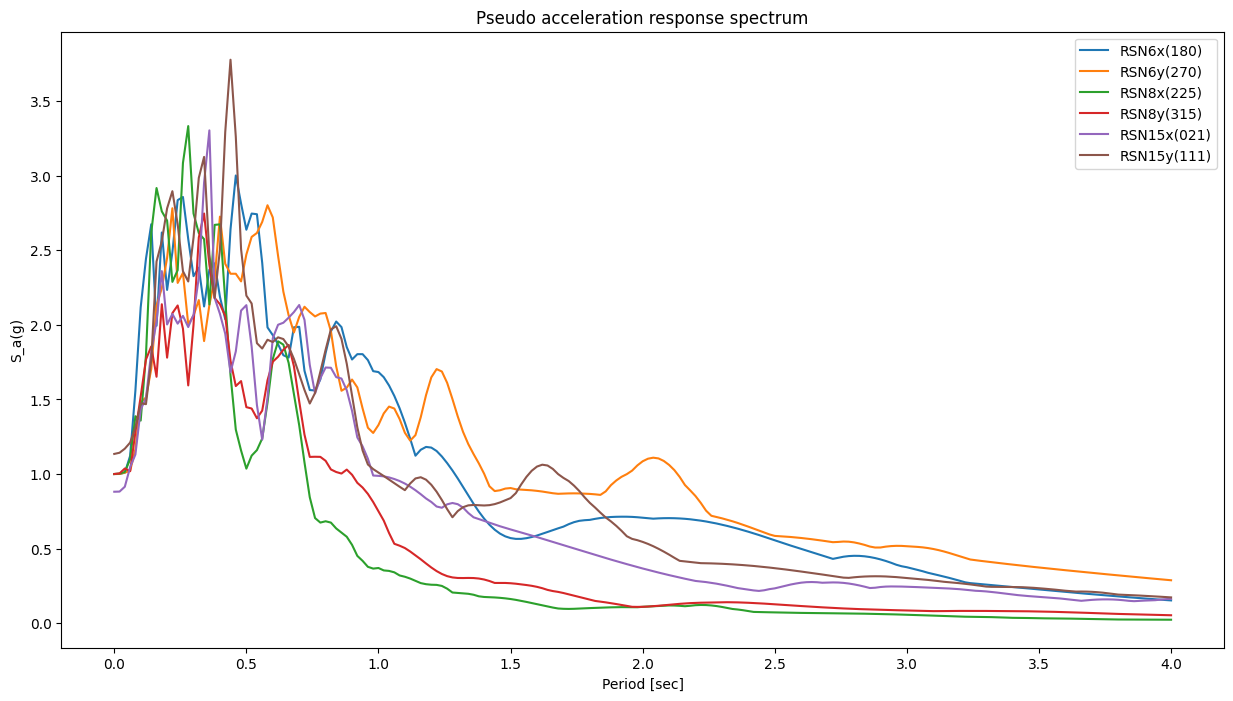

In [181]:
figure, ax = plt.subplots(figsize=(15, 8))
plt.ylabel("S_a(g)")
plt.xlabel("Period(s)")
plt.title("Pseudo acceleration response spectrum")
result_df[names2].plot(ax=ax) # here
plt.savefig("q2-1.png")

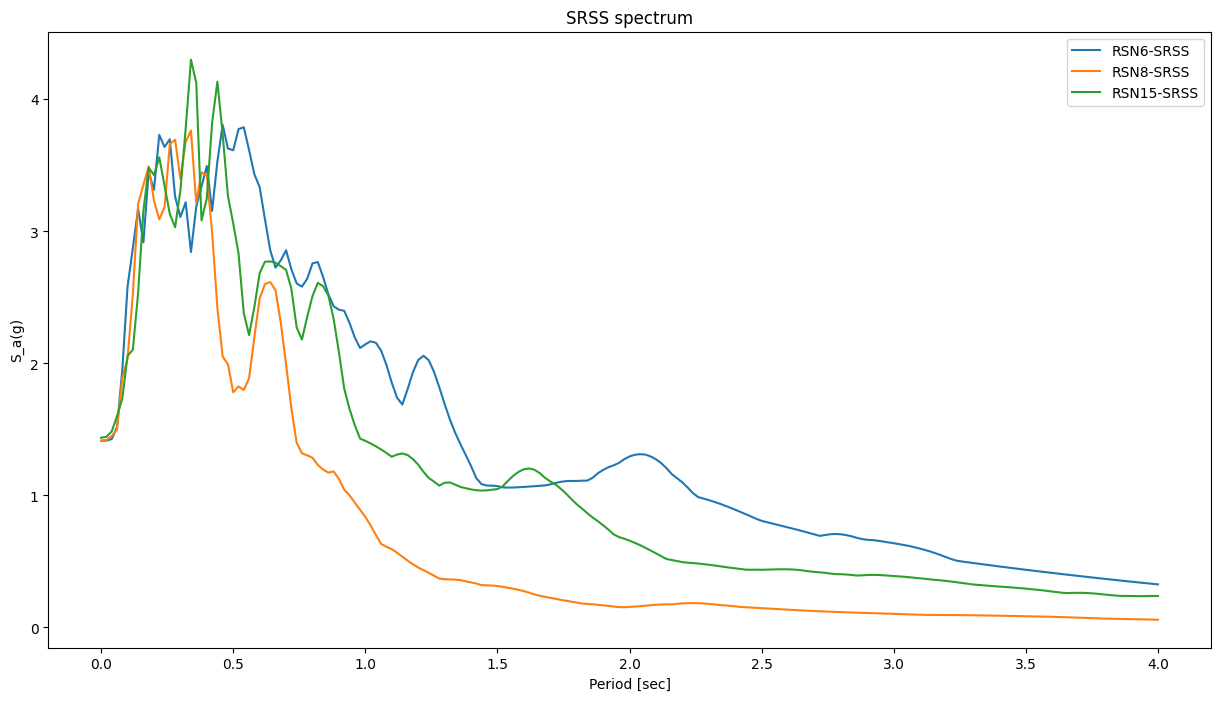

In [182]:
figure, ax = plt.subplots(figsize=(15, 8))
plt.title("SRSS spectrum")
plt.ylabel("S_a(g)")
plt.xlabel("Period(s)")
result_df[["RSN6-SRSS", "RSN8-SRSS", "RSN15-SRSS"]].plot(ax=ax) # here
plt.savefig("q2-2.png")

In [183]:
def average(x, y, z):
    r = x.values+y.values+z.values
    return r/3

result_df["Average SRSS"] = average(result_df["RSN6-SRSS"], result_df["RSN8-SRSS"], result_df["RSN15-SRSS"]) # here
result_df

,RSN6x(180),RSN6y(270),RSN8x(225),RSN8y(315),RSN15x(021),RSN15y(111),RSN6-SRSS,RSN8-SRSS,RSN15-SRSS,Average SRSS
Period [sec],,,,,,,,,,
0.00,1.000000,1.000000,1.000000,1.000000,0.881302,1.134684,1.414214,1.414214,1.436733,1.421720
0.02,1.000712,1.000380,1.002788,1.004028,0.882245,1.142614,1.414986,1.419034,1.443580,1.425867
0.04,1.008796,1.009395,1.013681,1.037156,0.914859,1.169866,1.427077,1.450255,1.485111,1.454148
0.06,1.121011,1.020452,1.098641,1.018989,1.045316,1.210523,1.515912,1.498449,1.599391,1.537917
0.08,1.558939,1.165797,1.387330,1.281217,1.130623,1.311725,1.946631,1.888439,1.731742,1.855604
...,...,...,...,...,...,...,...,...,...,...
3.92,0.163034,0.300750,0.023876,0.056967,0.152587,0.181572,0.342097,0.061768,0.237174,0.213680
3.94,0.160399,0.297523,0.023789,0.056062,0.154251,0.179558,0.338006,0.060901,0.236716,0.211874
3.96,0.157799,0.294296,0.023614,0.055158,0.158190,0.177418,0.333932,0.060001,0.237700,0.210544


In [184]:
def b_func(t):
    if 0<=t<t0:
        return s0 + (s-s0+1)*(t/t0)
    elif t0<=t<ts:
        return s+1
    elif t>=ts:
        return (s+1)*(ts/t)
    else:
        raise TypeError("[ERROR] Change t...")
    
def find_scaler(average, B):
    m = average.min()
    m_index = average.argmin()
    # if m > 0.9*B.iloc[m_index]:
    #     return 1
    # else:
    #     return 0.9*B.iloc[m_index] / m
    return 0.9*B.iloc[m_index] / m
    

result_df["t"] = result_df.index
result_df["B"] = result_df["t"].apply(lambda x: b_func(x))
result_df["1.3B"] = 1.3 * result_df["B"]

mask1 = 0.2*t1 <= result_df.index
mask2 = result_df.index <= 1.5*t1
mask = mask1.astype(int)+mask2.astype(int)
mask = mask > 1
scaler = find_scaler(result_df["Average SRSS"][mask], result_df["1.3B"][mask])
result_df["Scaled Average SRSS"] = scaler * result_df["Average SRSS"]
print(scaler)

1.1564363820632935


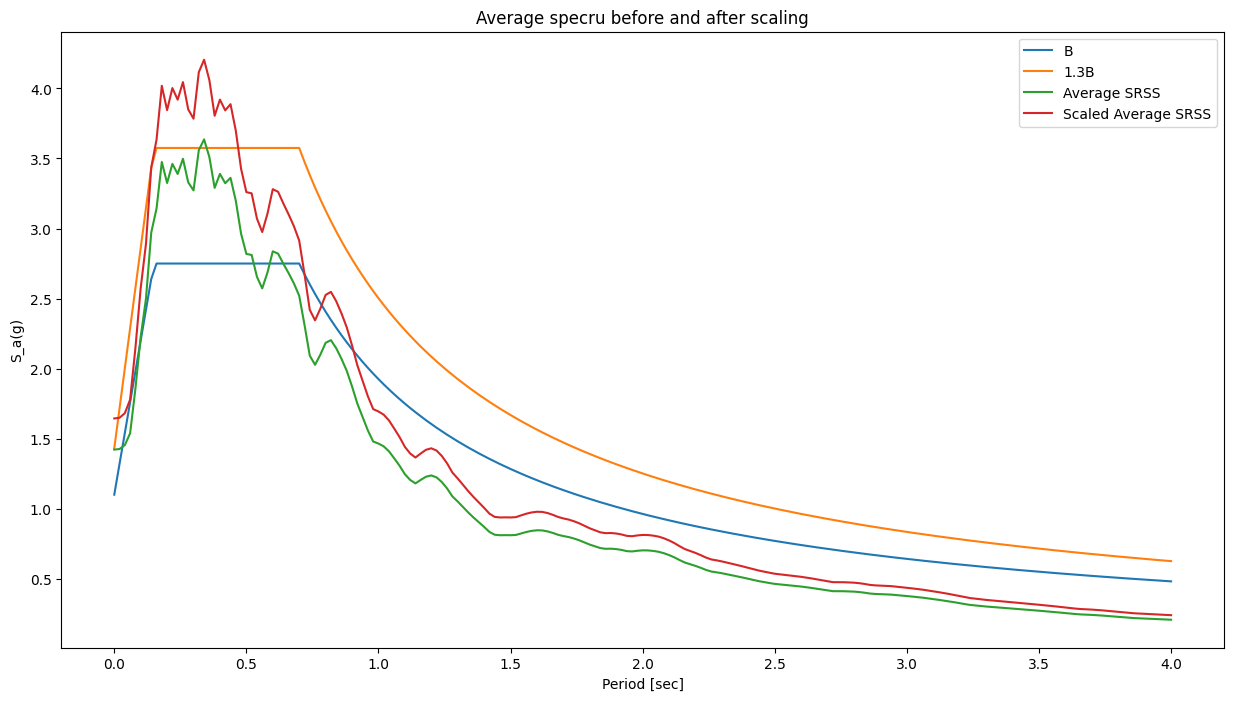

In [185]:
figure, ax = plt.subplots(figsize=(15, 8))
plt.ylabel("S_a(g)")
plt.title("Average specru before and after scaling")
result_df[["B", "1.3B", "Average SRSS", "Scaled Average SRSS"]].plot(ax=ax)
plt.savefig("q2-3.png")

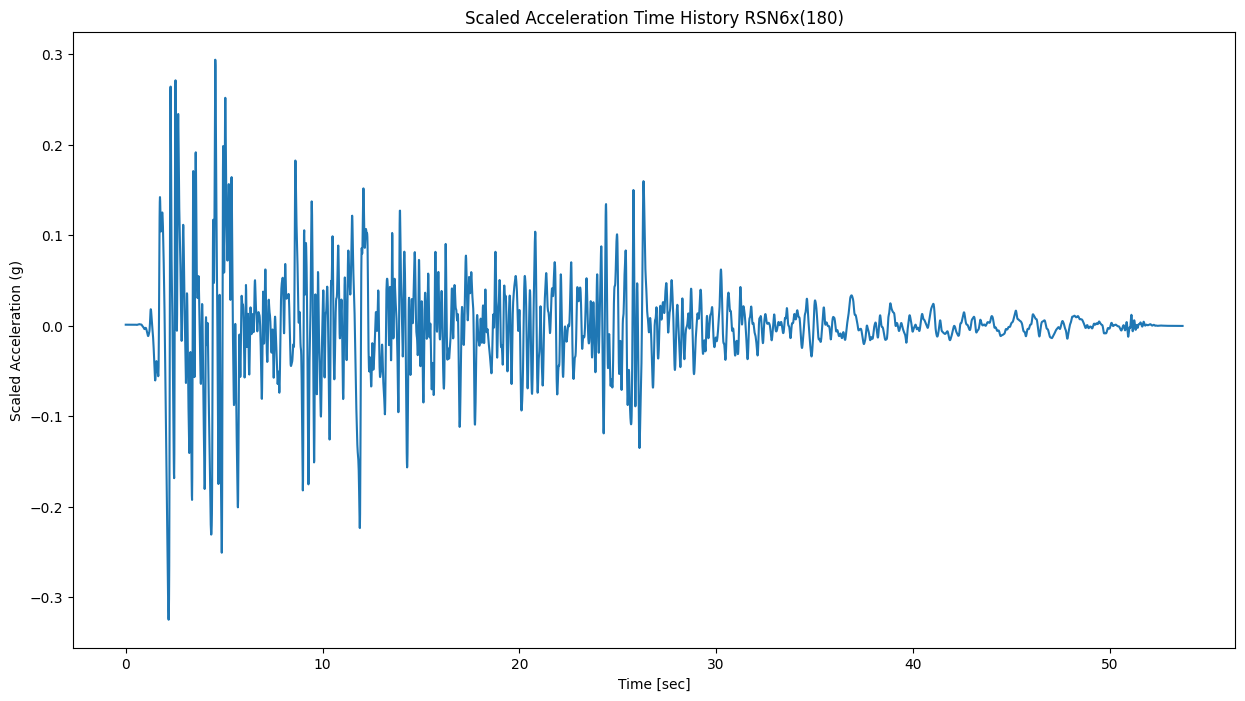

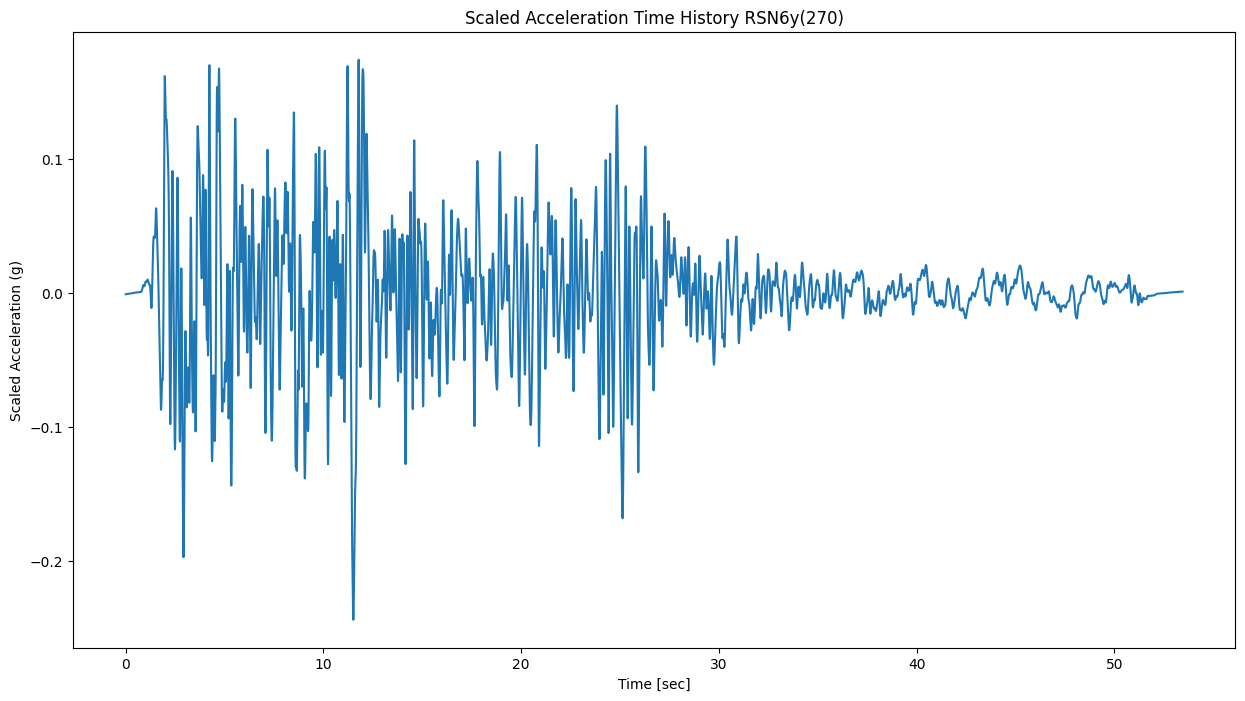

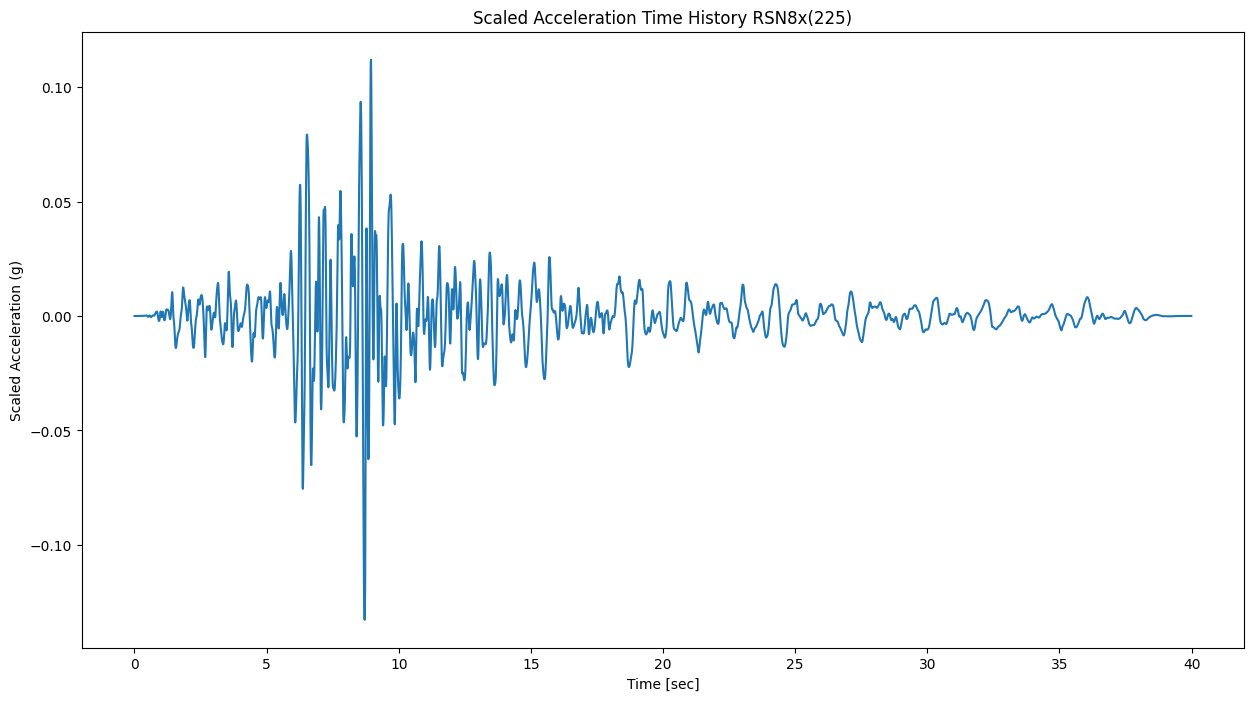

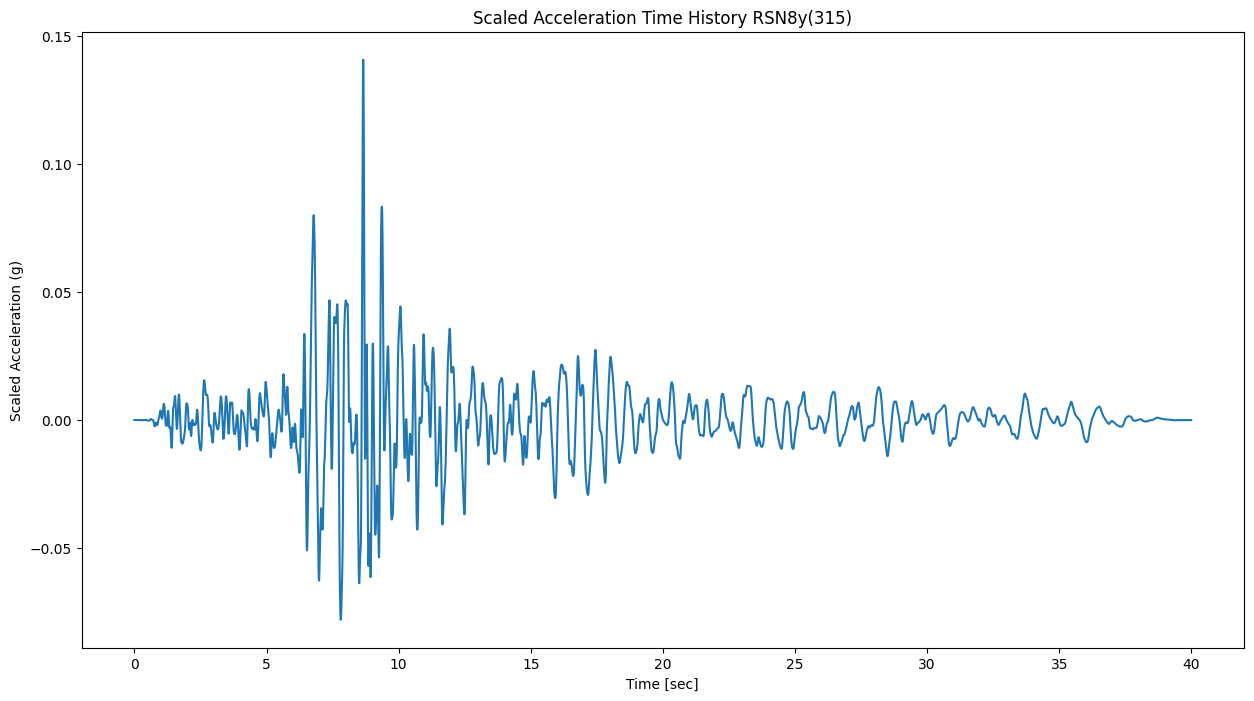

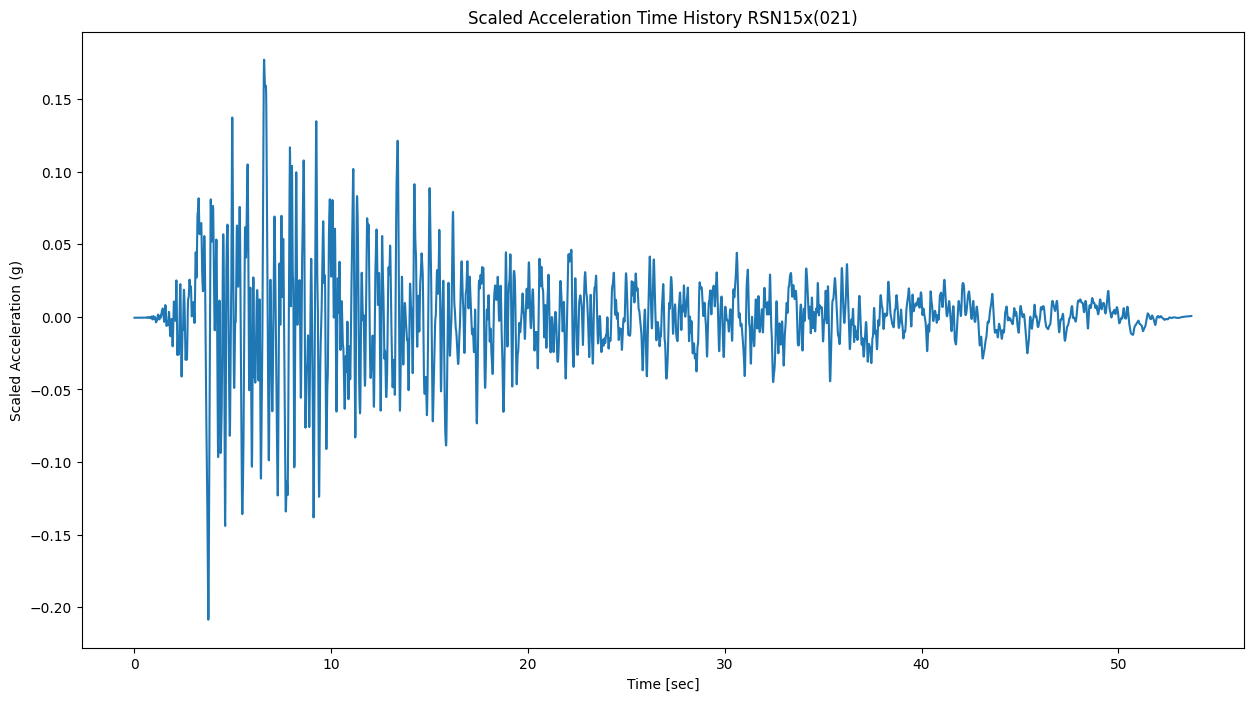

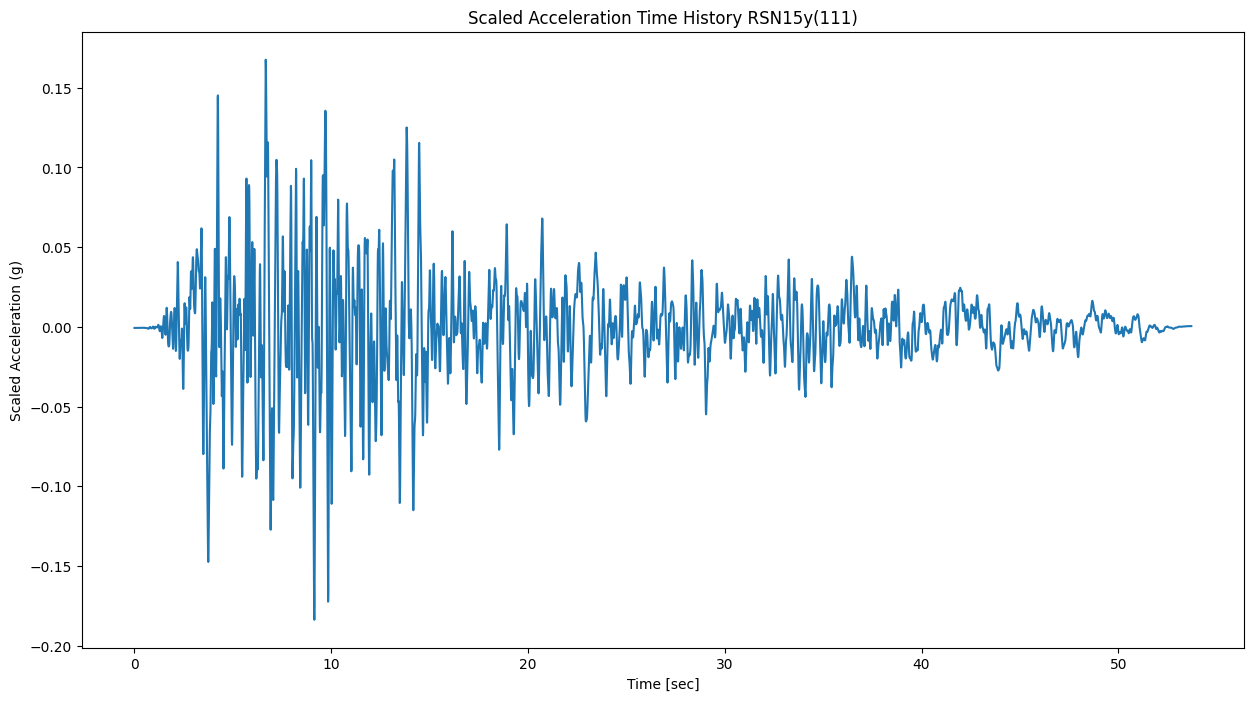

In [186]:
n = 3
for name in names2:
    n += 1
    result_df2[name+"Scaled"] = result_df2[name] * scaler
    figure, ax = plt.subplots(figsize=(15, 8))
    plt.title(f"Scaled Acceleration Time History {name}")
    plt.ylabel("Scaled Acceleration (g)")
    result_df2[name+"Scaled"].plot(ax=ax)
    plt.savefig(f"q2-{n}.png")
